### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент: Турсунов Баходурхон Азимджонович
##### Группа: Нфибд-03-19

## Москва 2022
***

### Вариант №  7

# 1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

In [1]:
# !pip install -q tfds-nightly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load("wine_quality", split='train')
df = tfds.as_dataframe(ds)

# 2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

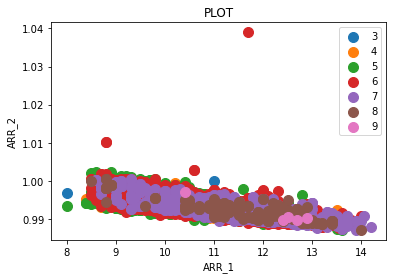

In [3]:
X=df[['features/alcohol', 'features/density']].values
y=df['quality']
fig = plt.figure()
ax = plt.axes()
for i in (np.unique(y)):
    row_ix = np.where(y == i)
    ax.scatter(X[row_ix, 0], X[row_ix, 1], s=100,label=i )
plt.title('PLOT')
plt.xlabel('ARR_1')
plt.ylabel('ARR_2')
plt.legend()
plt.show()

# 3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 

<AxesSubplot:>

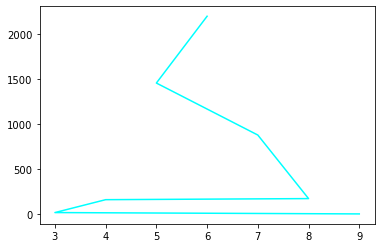

In [4]:
y.value_counts().plot(color='cyan')

In [5]:
y = pd.Series([0 if species == 6 else 1 for species in df['quality']])

<AxesSubplot:>

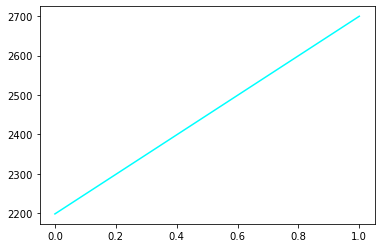

In [6]:
y.value_counts().plot(color='cyan')

# 4.	Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)
model = tf.keras.Sequential([feature_normalizer,tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history = model.fit(X_train, y_train, epochs=200)
prediction = model.predict(X_test)
prediction = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
np.unique(prediction)

Epoch 1/200
115/115 [==============================] - 2s 3ms/step - loss: 0.6876 - accuracy: 0.5516
Epoch 2/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5540
Epoch 3/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5532
Epoch 4/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5562
Epoch 5/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5565
Epoch 6/200
115/115 [==============================] - 1s 5ms/step - loss: 0.6809 - accuracy: 0.5633
Epoch 7/200
115/115 [==============================] - 1s 5ms/step - loss: 0.6793 - accuracy: 0.5704
Epoch 8/200
115/115 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.5701
Epoch 9/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5459
Epoch 10/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6789 - accura

115/115 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5589
Epoch 161/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5608
Epoch 162/200
115/115 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5696
Epoch 163/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5666
Epoch 164/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5628
Epoch 165/200
115/115 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.5625
Epoch 166/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5652
Epoch 167/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5674
Epoch 168/200
115/115 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5677
Epoch 169/200
115/115 [==============================] - 0s 4ms/step - loss: 0.6766 - a

array([0, 1])

# 5.	Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

<AxesSubplot:title={'center':'Тестовая выборка'}>

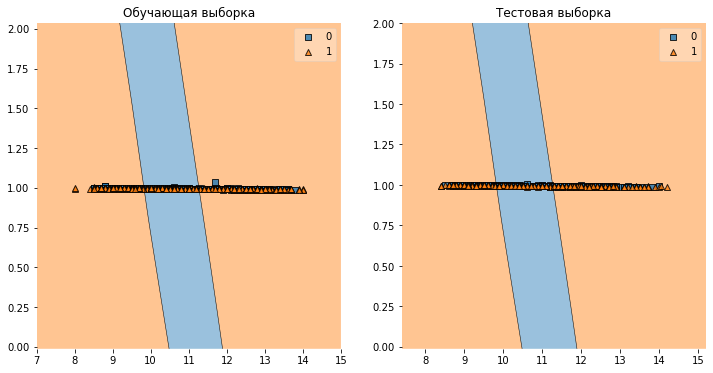

In [8]:
import warnings
warnings.filterwarnings("ignore")

from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_regions(X_train, y_train.values, model)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_regions(X_test, y_test.values, model)

# 6.	Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

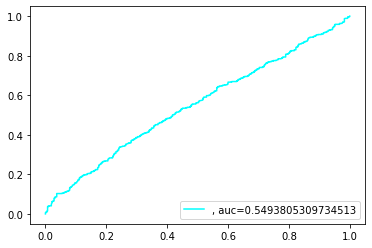

In [9]:
fpr, tpr, _ = metrics.roc_curve(y_test,  model.predict(X_test))
auc = metrics.roc_auc_score(y_test, model.predict(X_test))
plt.plot(fpr,tpr,label=", auc="+str(auc),color='cyan')
plt.legend(loc=4)
plt.show()

# 7.	Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 

In [10]:
X = np.array(df.drop('quality', axis=1))
y = np.array(df['quality'])
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X)
model_aux = tf.keras.Sequential([feature_normalizer,tf.keras.layers.Dense(1, activation='sigmoid')
])
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(X, y, epochs=100, verbose=0);
model_aux.layers[1].kernel

<tf.Variable 'dense_4/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-15.089177 ],
       [-15.275103 ],
       [-15.934899 ],
       [-15.687599 ],
       [-15.312748 ],
       [ 14.502067 ],
       [-14.912778 ],
       [-15.99827  ],
       [-14.7400255],
       [ 14.790203 ],
       [-16.062008 ]], dtype=float32)>

In [17]:
X = df[['features/density', 'features/alcohol', 'features/citric acid']].values
y = df['quality'].values

# 8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

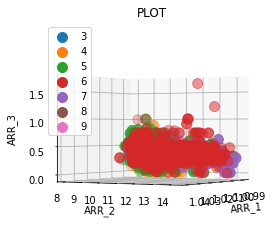

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in (np.unique(y)):
    row_ix = np.where(y == i)
    ax.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2],s=100,label=i )
plt.title('PLOT')
plt.xlabel('ARR_1')
plt.ylabel('ARR_2')
ax.set_zlabel('ARR_3')
plt.legend()
ax.view_init( azim=30, elev=0 )
plt.show()

# 9.	Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1).values, df['quality'].astype(int).values)
def to_one_hot(labels, dimension=11):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train.shape, y_test.shape
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)
model = tf.keras.Sequential([feature_normalizer,tf.keras.layers.Dense(128, activation="relu"),tf.keras.layers.Dense(128, activation="relu"),tf.keras.layers.Dense(128, activation="relu"),tf.keras.layers.Dense(11, activation="softmax")])
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 1.3675 - accuracy: 0.4183 - val_loss: 1.2781 - val_accuracy: 0.4857
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 1.2819 - accuracy: 0.4299 - val_loss: 1.2715 - val_accuracy: 0.4776
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 1.2552 - accuracy: 0.4408 - val_loss: 1.2205 - val_accuracy: 0.4844
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 1.2415 - accuracy: 0.4333 - val_loss: 1.2276 - val_accuracy: 0.4925
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 1.2290 - accuracy: 0.4428 - val_loss: 1.2222 - val_accuracy: 0.4898
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 1.2187 - accuracy: 0.4472 - val_loss: 1.2017 - val_accuracy: 0.4898
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 1.2190 - accuracy: 0.4462 - val_loss: 1.2189 - val_accuracy: 0.4925
Epoch 8/100
9

Epoch 59/100
92/92 [==============================] - 0s 4ms/step - loss: 1.0970 - accuracy: 0.5146 - val_loss: 1.2749 - val_accuracy: 0.4517
Epoch 60/100
92/92 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.5177 - val_loss: 1.1381 - val_accuracy: 0.5238
Epoch 61/100
92/92 [==============================] - 1s 5ms/step - loss: 1.0908 - accuracy: 0.5197 - val_loss: 1.1605 - val_accuracy: 0.5102
Epoch 62/100
92/92 [==============================] - 0s 4ms/step - loss: 1.0876 - accuracy: 0.5272 - val_loss: 1.1466 - val_accuracy: 0.5252
Epoch 63/100
92/92 [==============================] - 0s 4ms/step - loss: 1.0898 - accuracy: 0.5201 - val_loss: 1.1314 - val_accuracy: 0.5333
Epoch 64/100
92/92 [==============================] - 0s 4ms/step - loss: 1.0819 - accuracy: 0.5276 - val_loss: 1.1430 - val_accuracy: 0.5306
Epoch 65/100
92/92 [==============================] - 0s 4ms/step - loss: 1.0857 - accuracy: 0.5211 - val_loss: 1.1574 - val_accuracy: 0.5320
Epoch 

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 11)               3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 11)                1419      
                                                                 
Total params: 35,982
Trainable params: 35,979
Non-trainable params: 3
__________________________________________________

# 10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

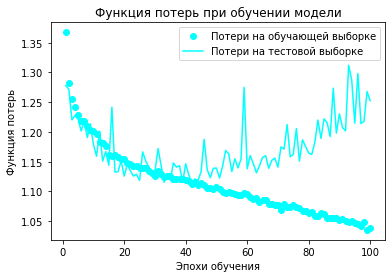

In [15]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке",color='cyan')
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке",color='cyan')
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();